# - Predicting if the cancer diagnosis is benign or malignant based on several observations/features 


- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign
         
         
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQjuiDaPbVi3jtsh-uepYaqpN-iX3SuDAmiIg&usqp=CAU=" width=900 height=900 />




# import libraries 

In [71]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # Import Pandas for data manipulation using dataframes
import numpy as np  # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization
# %matplotlib inline

# Import Cancer data drom the Sklearn library

In [72]:
data = pd.read_csv("BreastCancerDetection.csv")

# VISUALIZING THE DATA

In [73]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [74]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [75]:
#remove id and Unnamed: 32
data=data.iloc[:,1:-1]

In [76]:
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [77]:
data["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [78]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

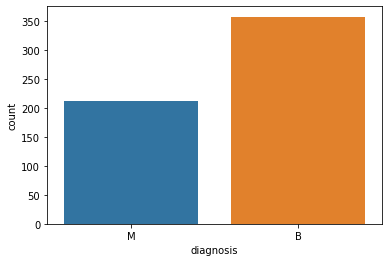

In [79]:
sns.countplot(data['diagnosis'], label = "Count") 

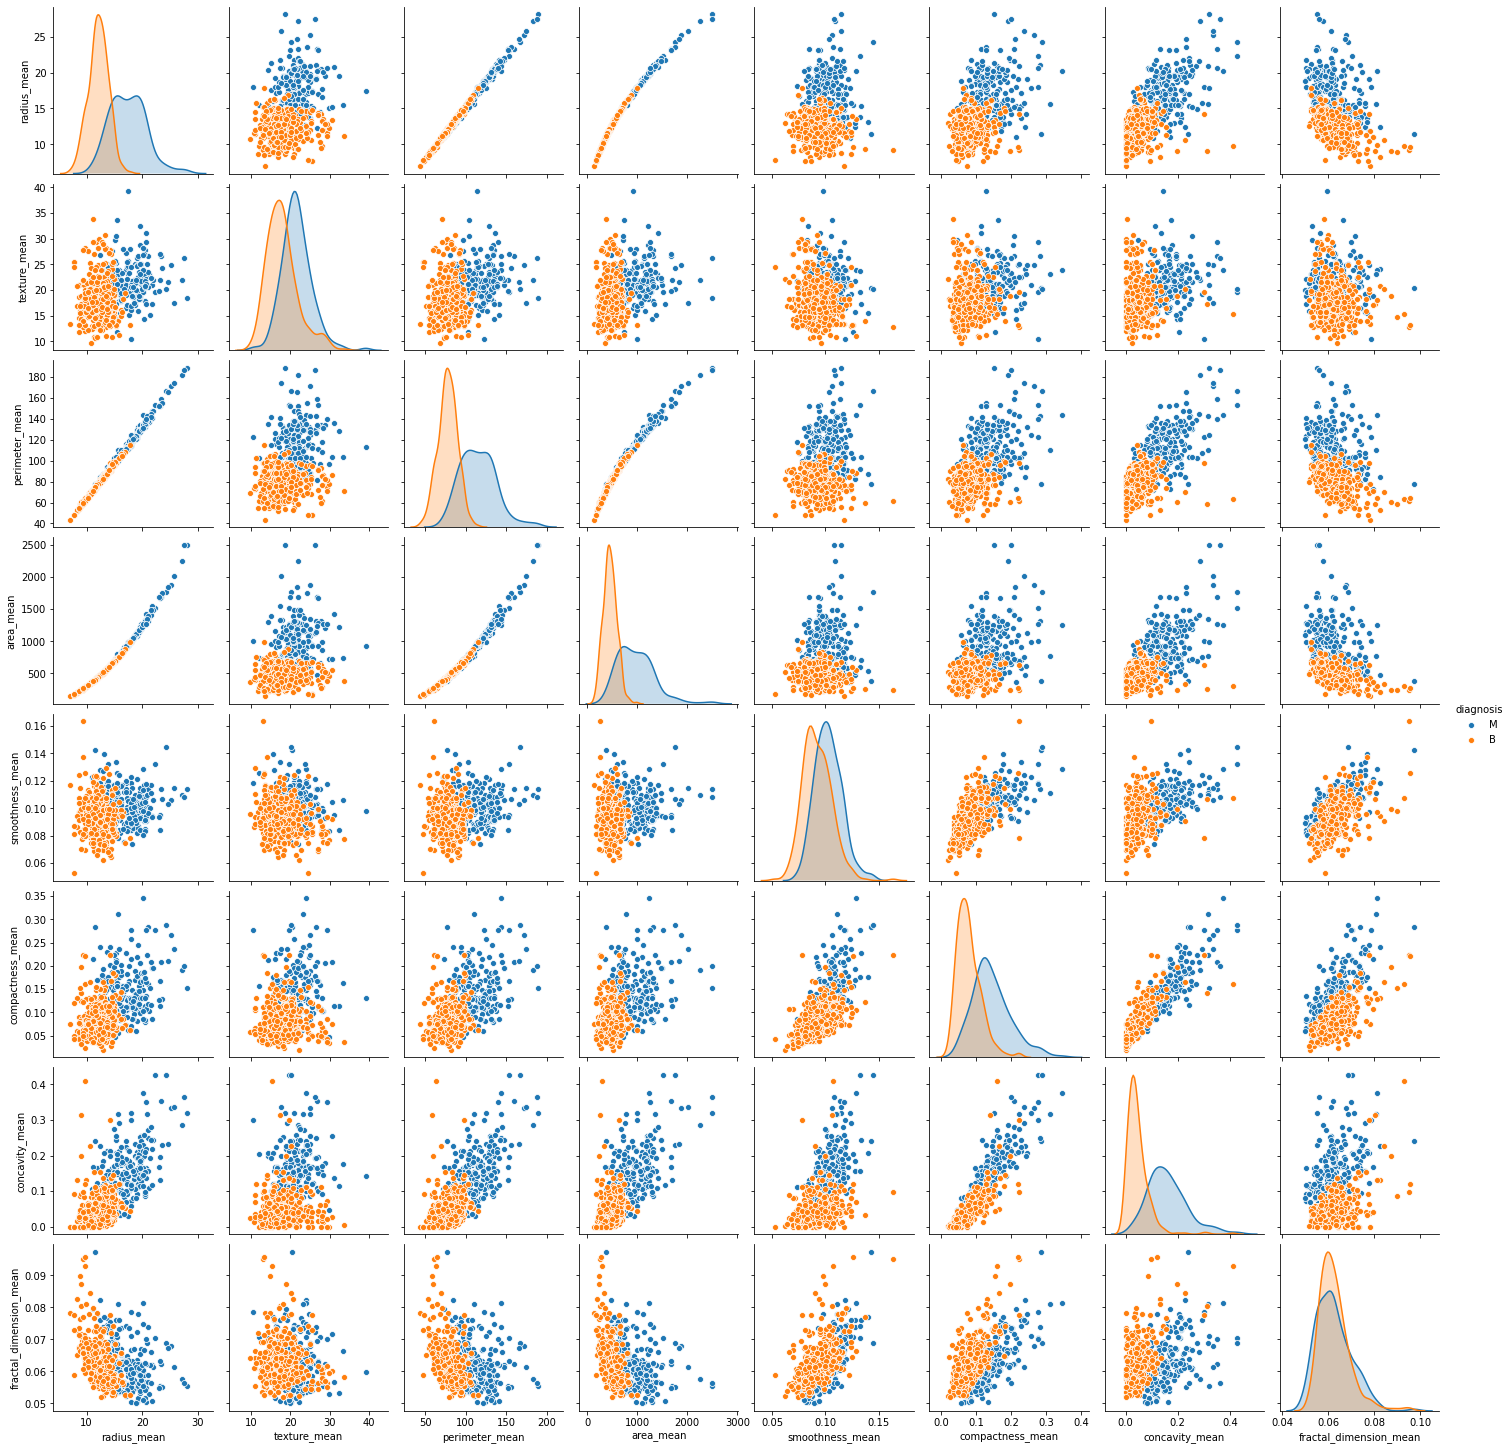

In [80]:
sns.pairplot(data, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'fractal_dimension_mean',] )

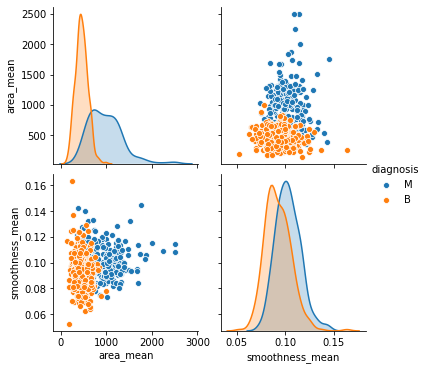

In [81]:
sns.pairplot(data, hue = 'diagnosis', vars = [
       'area_mean', 'smoothness_mean', ] )

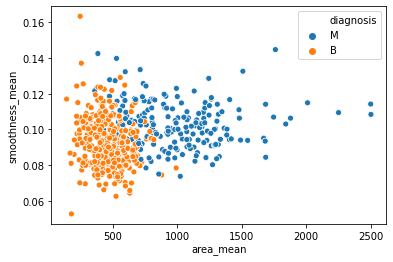

In [82]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = data)

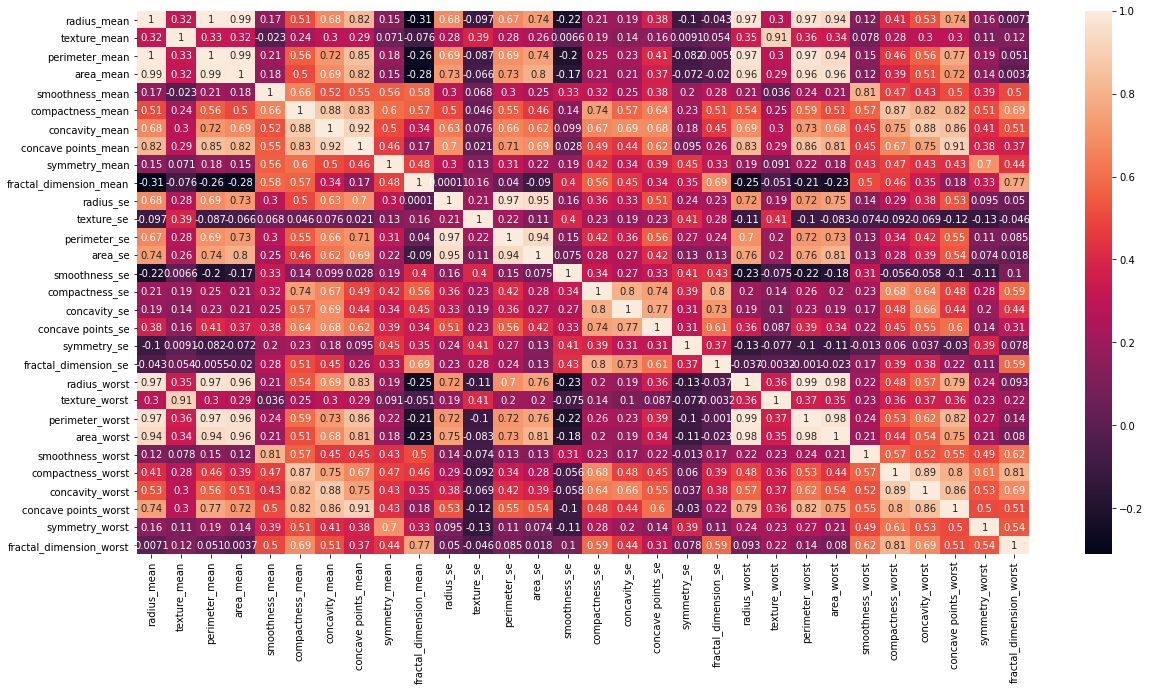

In [83]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)

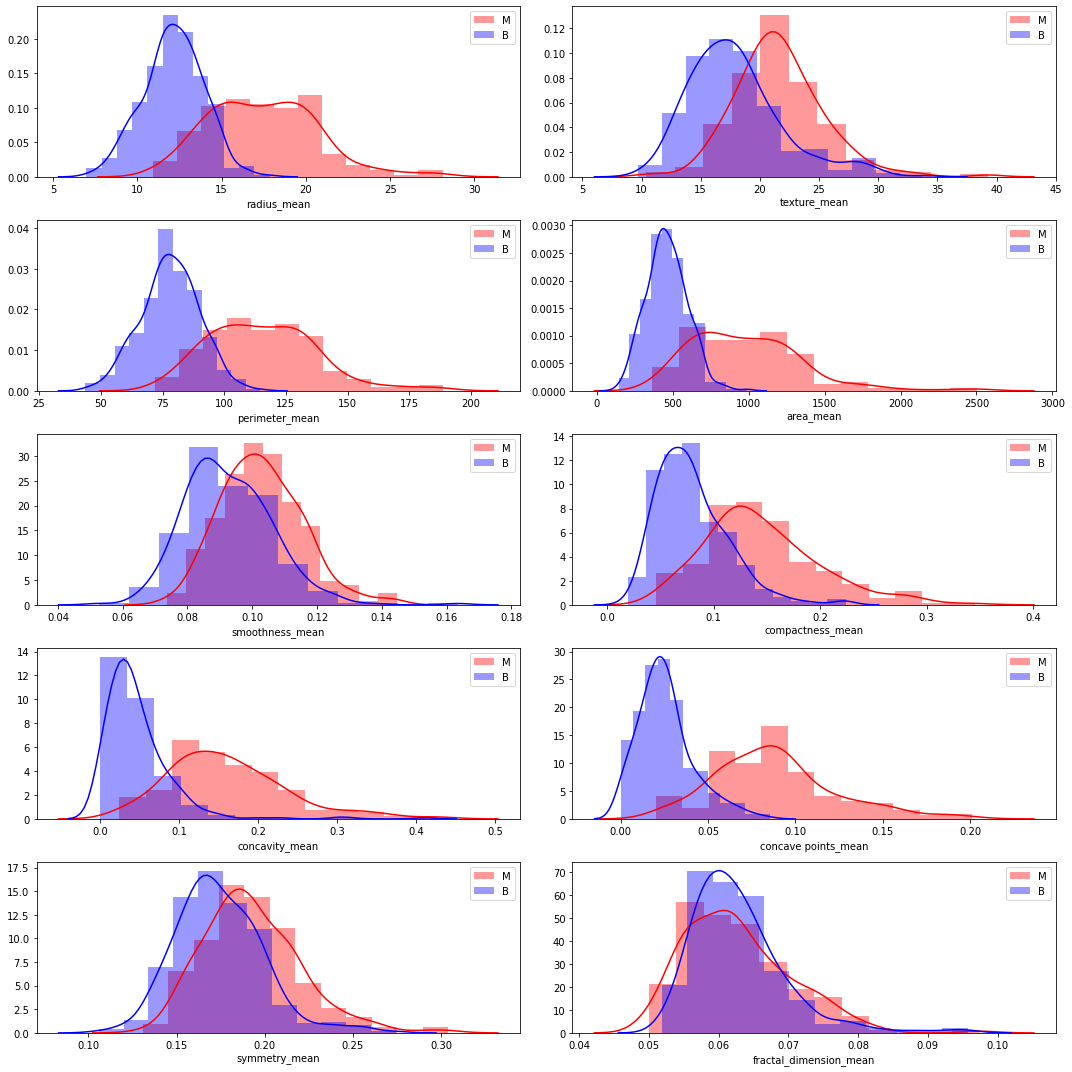

In [84]:
bins = 12
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
features_mean= list(data.columns[1:11])

plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

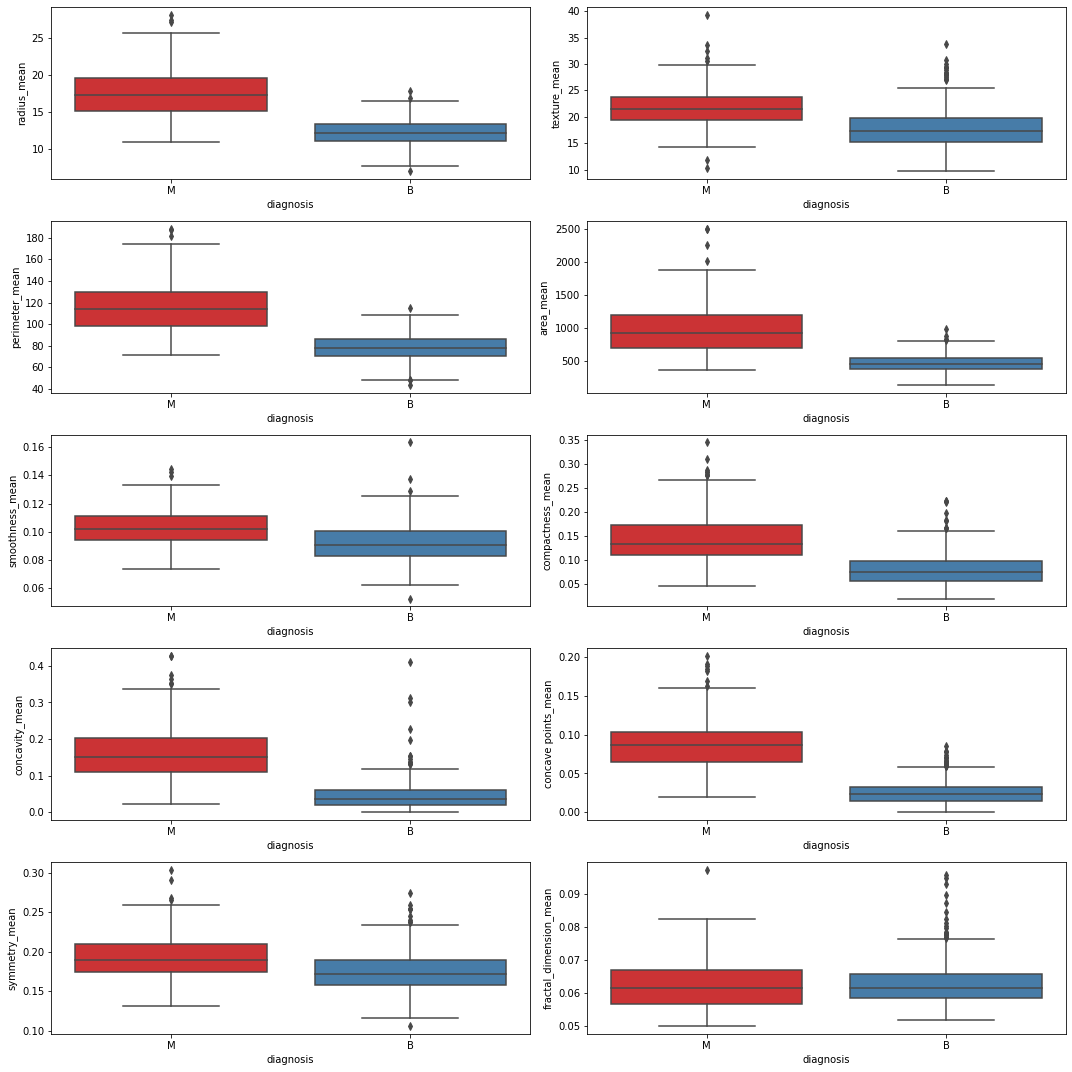

In [85]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

# Models 

# Split the data

In [86]:
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

X_standard = X.apply(zscore)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

In [87]:
X_train.shape

(426, 30)

In [88]:
X_test.shape

(143, 30)

# # SVM

In [89]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [90]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

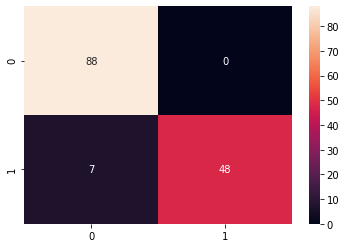

In [91]:
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        88
           M       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



# Improve the model

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        88
           M       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



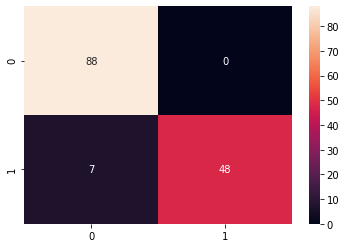

In [93]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

# Improve version 2

In [94]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [95]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.628, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.894, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.906, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.824, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [96]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [97]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



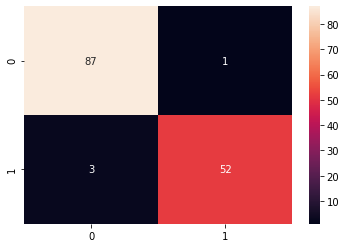

In [98]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# KNN 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        88
           M       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



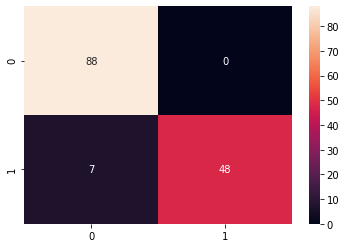

In [100]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predict))

# K means

In [101]:
X_area_mean = data['area_mean']
X_smoothness_mean=data["smoothness_mean"]
X_radius_mean= data["radius_mean"]
y = data['diagnosis']

# decision_tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [103]:
feature_importances

,importance
concave points_worst,0.693344
area_worst,0.118622
smoothness_worst,0.034203
perimeter_se,0.028365
perimeter_mean,0.020174
texture_worst,0.018112
radius_se,0.018025
concavity_worst,0.017355
perimeter_worst,0.013845
area_mean,0.012609


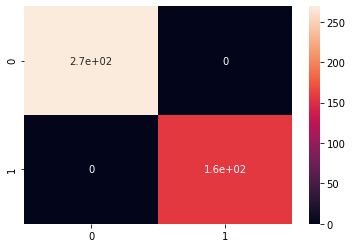

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.94      0.97      0.96        88
           M       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



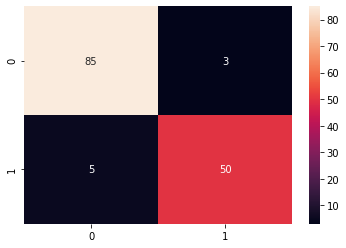

In [105]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# Random Forest

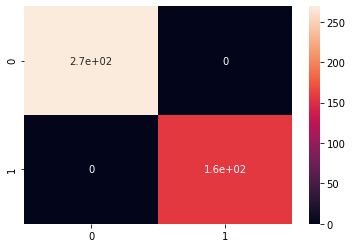

In [106]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



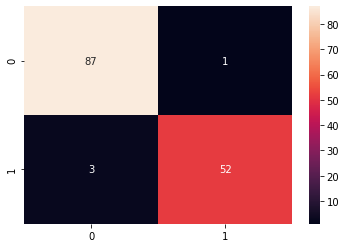

In [107]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

# Naive Bayes

In [108]:
from sklearn.preprocessing import StandardScaler
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
y = data['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

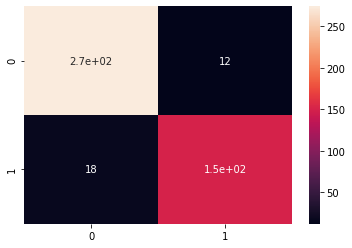

In [109]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

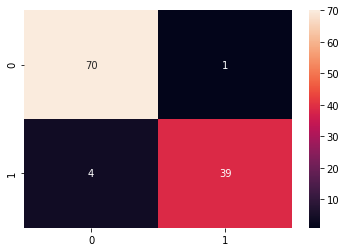

In [110]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [111]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [112]:
sum(y_test)

43

# Logistic Regression

In [113]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

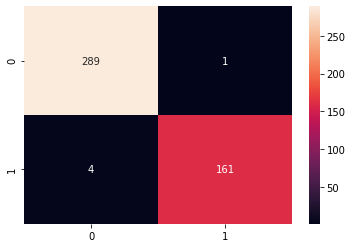

In [114]:
y_predict_train = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

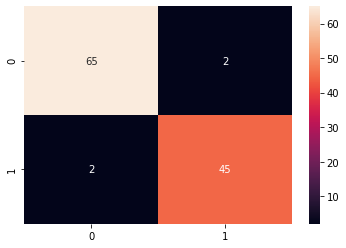

In [115]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# neural network multi layer perspetron

/Users/user/.conda/envs/soldgame/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


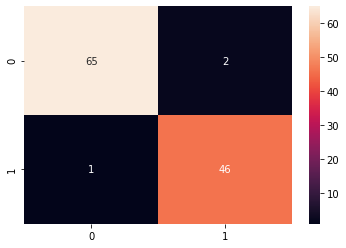

In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Define model. Specify a number for random_state to ensure same results each run
try_model = MLPClassifier()

# Fit model
try_model.fit(X_train, y_train)

#check prediction
y_predict = try_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True)

In [118]:
  from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# bernuli&linear regression

[BernoulliRBM] Iteration 1, pseudo-likelihood = -64.83, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -123.16, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -181.52, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -240.13, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -298.90, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -357.78, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -416.73, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -475.71, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -534.71, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -593.74, time = 0.01s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.82      0.89      0.86        47

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.8

'The accuracy is 0.88     The f1_score is 0.87'

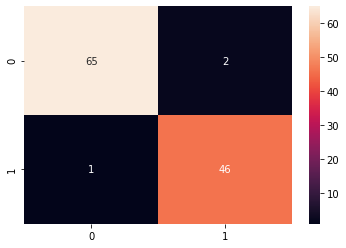

In [119]:
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# Define model. Specify a number for random_state to ensure same results each run
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Fit model
rbm_features_classifier.fit(X_train, y_train)

#check prediction
y_predict = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_predict)))


sns.heatmap(cm, annot=True)

#accuracy and f1
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict, average='macro')
f'The accuracy is %.2f     The f1_score is %.2f' % (acc,f1)

# Gradient Decent 

In [120]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
start = time.time()
accuracy_selection=[]
cvs_selection=[]

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: %s seconds \n" % "{0:.5}".format(end-start))

SGD Classifier Accuracy: 96.49%
Cross validation score: 97.19% (+/- 1.30%)
Execution time: 0.018086 seconds 



# VISUALISING PCA AND TENSERFLOW PLOTS

In [121]:
# # Convert the diagnosis column to numeric format
# data['diagnosis'] = data['diagnosis'].factorize()[0]
# # Fill all Null values with zero
# data = data.fillna(value=0)
# # Store the diagnosis column in a target object and then drop it
# target = data['diagnosis']
# data = data.drop('diagnosis', axis=1)

In [122]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [123]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679842
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.208981
[t-SNE] KL divergence after 2000 iterations: 0.217653


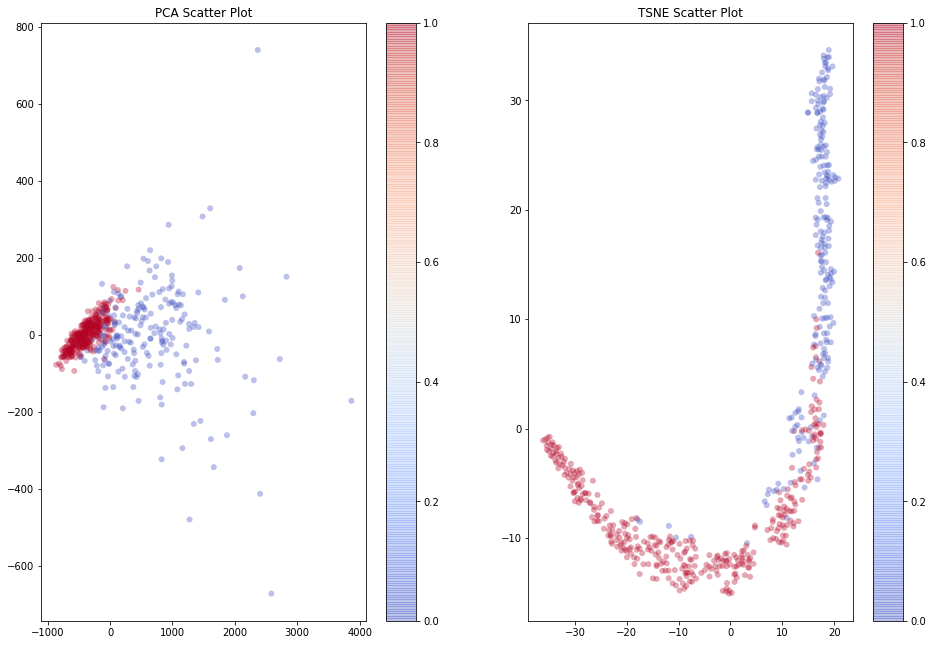

In [124]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# PCA

In [125]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.75429803, -1.15036482, -0.39064196, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.75429803, -0.93798972,  0.68051405, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-0.75429803,  0.574121  , -1.03333557, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-0.75429803, -1.32422924, -0.20048168, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.75429803, -1.24380987, -0.2245526 , ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.75429803, -0.73694129,  1.14989702, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [126]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



In [127]:
explained_variance

array([0.4408786 , 0.19202999])

In [128]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        67
           1       0.92      1.00      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



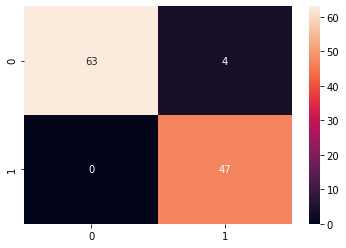

In [129]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test, y_pred))

In [130]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))



In [131]:
X2.ravel().shape

(5320464,)

In [132]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

(2228, 2388)

In [133]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors

# z = np.exp(-X1**2-X2**2)*1.5+0.2

# colors = ["red", "blue"]
# cmap= matplotlib.colors.ListedColormap(colors)
# boundaries=[z.min(), 0.35, 0.7, 1.05, 1.4, z.max()]

# m = plt.contourf(X1, X2, z, levels = boundaries, cmap=cmap)

# plt.colorbar(m, spacing="proportional")
# plt.show()

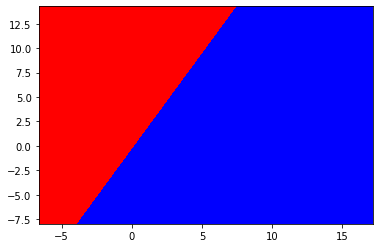

In [134]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), cmap = ListedColormap(("red","blue")))



# Keras and Tenserflow 

In [147]:
data = pd.read_csv("BreastCancerDetection.csv")

#remove the last column
data =data.iloc[:,1:-1]
#looking for exceptions
from scipy.stats import zscore

z = np.abs(zscore(data.iloc[:,1:]))
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

X_standard = X.apply(zscore)

In [148]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.7, random_state=1)

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
def baseline_model(units1, units2, dropout):
    model = Sequential()
    model.add(Dense(units1, input_shape=(30,), activation='relu'))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
    model.add(Dropout(dropout))
    model.add(BatchNormalization(axis=1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.summary()

    return model

In [150]:
#stop the training if arriving to good results
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')

In [151]:
units1 = 128
units2 = 128
dropout = 0.25
 
# Fit the model
model = baseline_model(units1, units2, dropout)

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(x_val,y_val), 
                    callbacks=[es])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

13/13 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9935 - val_loss: 0.2185 - val_accuracy: 0.9750
Epoch 37/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.9960 - val_loss: 0.2280 - val_accuracy: 0.9667
Epoch 38/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1775 - accuracy: 0.9801 - val_loss: 0.2277 - val_accuracy: 0.9667
Epoch 39/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9931 - val_loss: 0.2210 - val_accuracy: 0.9500
Epoch 40/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9913 - val_loss: 0.2099 - val_accuracy: 0.9750
Epoch 41/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9703 - val_loss: 0.1967 - val_accuracy: 0.9750
Epoch 42/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.9857 - val_loss: 0.1917 - val_accuracy: 0.9750
Epoch 43/50
13/13 [======

In [152]:
loss, acc = model.evaluate(x_train, y_train)
loss, acc = model.evaluate(x_val, y_val)
loss, acc = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9216


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The accuracy is: 0.92
f1 score : 0.91 


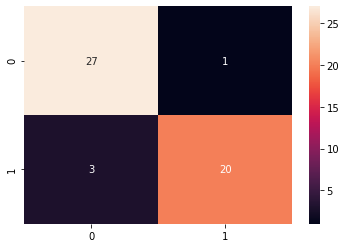

In [153]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_pred = model.predict(x_test)
y_pred = np.array([0 if n <= .5 else 1 for n in y_pred])
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d")
acc = accuracy_score(y_test, y_pred)
print('The accuracy is: %.2f' % acc)
print('f1 score : %.2f '% f1_score(y_test, y_pred))

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.95      0.87      0.91        23

    accuracy                           0.92        51
   macro avg       0.93      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51



# Yuval's Tenserflow

In [155]:
x_standard = X.apply(zscore)
x_standard.describe()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
#units = (30+1)/2
# result is binary - 1
#X_train shape is (6000,11) 
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 32, epochs = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

#y_pred = (y_pred > 0.5)



(398, 30)
(398,)
(171, 30)
(171,)
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - 0s 24ms/step - loss: 0.6923 - accuracy: 0.5637
Epoch 2/100
13/13 [==============================] - 0s 715us/step - loss: 0.6866 - accuracy: 0.6132
Epoch 3/100
13/13 [==============================] - 0s 704us/step - loss: 0.6697 - accuracy: 0.7684
Epoch 4/100
13/13 [=======================

13/13 [==============================] - 0s 791us/step - loss: 0.0180 - accuracy: 0.9985
Epoch 73/100
13/13 [==============================] - 0s 778us/step - loss: 0.0211 - accuracy: 0.9976
Epoch 74/100
13/13 [==============================] - 0s 819us/step - loss: 0.0296 - accuracy: 0.9939
Epoch 75/100
13/13 [==============================] - 0s 797us/step - loss: 0.0345 - accuracy: 0.9929
Epoch 76/100
13/13 [==============================] - 0s 760us/step - loss: 0.0395 - accuracy: 0.9918
Epoch 77/100
13/13 [==============================] - 0s 745us/step - loss: 0.0424 - accuracy: 0.9888
Epoch 78/100
13/13 [==============================] - 0s 789us/step - loss: 0.0341 - accuracy: 0.9912
Epoch 79/100
13/13 [==============================] - 0s 744us/step - loss: 0.0204 - accuracy: 0.9973
Epoch 80/100
13/13 [==============================] - 0s 725us/step - loss: 0.0177 - accuracy: 0.9970
Epoch 81/100
13/13 [==============================] - 0s 754us/step - loss: 0.0318 - accuracy: 

In [156]:
y_pred = classifier.predict(x_test)

y_pred = (y_pred > 0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(171, 1)
(171,)


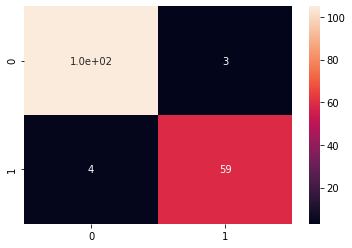

In [157]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(y_pred.shape)
print(y_test.shape)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)



In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Loop - Get best paramiters 

In [159]:
# #def baseline_model(units1, units2, dropout):

# best_i=1
# best_j=1
# best_d=1
# best_loss=1.0
# best_acc=0.0

# best_batch_size=1
# best_epochs=1

# for i in range(1,128):
#     for j in range(1,128):
#         for d in range(1,100,5):
#             model= baseline_model(i, j, d/100)
#             history = model.fit(x_train, y_train, 
#                     batch_size=32, 
#                     epochs=50, 
#                     validation_data=(x_val,y_val), 
#                     callbacks=[es])
            
# #            
#             loss, acc = model.evaluate(x_test, y_test)
#             print("the best yet are:")
#             print("best i %d the best j is %d the best d is %d " %(best_i,best_j,best_d) )
#             print('The best accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            
#             if(best_loss>loss and best_acc<acc):
#                 best_loss=loss 
#                 best_acc=acc
#                 best_i=i
#                 best_j=j
#                 best_d=d
#                 print("-----------------------------------------------new score")
#                 print('The accuracy is: %.2f loss is  %.2f ' %(acc,loss)) 
            

In [160]:
# print(i,j,d)
# print("best results", 
# best_i,
# best_j,
# best_d,
# best_loss,
# best_acc)

# removing exceptional data and checking again the models


[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'concave points_mean'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'fractal_dimension_mean'),
 Text(0, 0, 'radius_se'),
 Text(0, 0, 'texture_se'),
 Text(0, 0, 'perimeter_se'),
 Text(0, 0, 'area_se'),
 Text(0, 0, 'smoothness_se'),
 Text(0, 0, 'compactness_se'),
 Text(0, 0, 'concavity_se'),
 Text(0, 0, 'concave points_se'),
 Text(0, 0, 'symmetry_se'),
 Text(0, 0, 'fractal_dimension_se'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'concavity_worst'),
 Text(0, 0, 'concave points_worst'),
 Text(0, 0, 'symmetry_worst'),
 Text(0, 0, 'fractal_dimension_worst')]

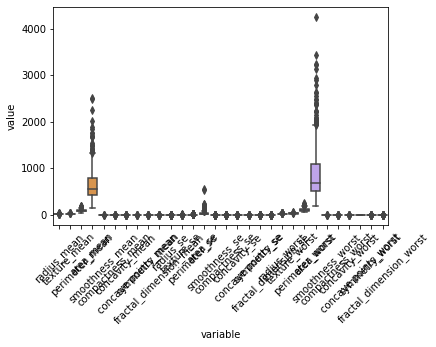

In [161]:
#cutting first column
data2=data.iloc[:,1:]
chart = sns.boxplot(x="variable", y="value", data=pd.melt(data2))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [162]:
from scipy.stats import zscore
z0 = data2.apply(zscore)
z = np.abs(zscore(data2))
z0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [163]:
z[0]
data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [164]:
#removing exeptional points
z_in = (np.abs(zscore(data2)) < 3)
data_clean = data2[z_in.all(axis=1)]

In [165]:
data_clean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


# pytorch

# version 1 

In [192]:
from torch.autograd import Variable
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [193]:
data = pd.read_csv("BreastCancerDetection.csv")

In [194]:
cols = data.columns
x_data = data[cols[2:-1]]
y_data = data[cols[1]] #diagnosis
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_ 


(array([1, 1, 1, 1, 1]), array(['B', 'M'], dtype=object))

In [195]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [196]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()
y_pred = model(x_data.float())

y_pred

tensor([[0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4131],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4131],
        [0.4131],
        [0.4111],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4094],
        [0.4122],
        [0.4020],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4119],
        [0.4043],
        [0.4123],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4061],
        [0.4112],
        [0.4120],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.4043],
        [0.3957],
        [0.4043],
        [0.4045],
        [0.4059],
        [0.4058],
        [0.4131],
        [0.4095],
        [0.4115],
        [0.4043],
        [0

In [197]:
x_data.float().size(), y_data.float().size() 

(torch.Size([569, 30]), torch.Size([569]))

In [198]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(500):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#The error function is the function representing the difference between the values 
#computed by your model and the real values. In the optimization field often they
#speak about two phases: a training phase in which the model is set,
#and a test phase in which the model tests its behaviour against the real values of output.
#In the training phase the error is necessary to improve the model, 
#while in the test phase the error is useful to check if the model works properly.

#The objective function is the function you want to maximize or minimize. 
#When they call it "cost function" (again, it's the objective function)
#it's because they want to only minimize it. 
#I see the cost function and the objective function as the same thing seen from slightly 
#different perspectives.

#The "criterion" is usually the rule for stopping the algorithm you're using.
#Suppose you want that your model find the minimum of an objective function,
#in real experiences it is often hard to find the exact minimum and the algorithm 
#could continuing to work for a very long time. In that case you could accept to 
#stop it "near" to the optimum with a particular stopping criterion.

Epoch 0 Loss: 378.2705078125 - Pred: tensor([0.4043])
Epoch 1 Loss: 377.6853332519531 - Pred: tensor([0.4028])
Epoch 2 Loss: 376.990234375 - Pred: tensor([0.4014])
Epoch 3 Loss: 376.2508850097656 - Pred: tensor([0.4000])
Epoch 4 Loss: 375.5560302734375 - Pred: tensor([0.3986])
Epoch 5 Loss: 374.87188720703125 - Pred: tensor([0.3973])
Epoch 6 Loss: 374.17022705078125 - Pred: tensor([0.3960])
Epoch 7 Loss: 373.51531982421875 - Pred: tensor([0.3947])
Epoch 8 Loss: 372.9516296386719 - Pred: tensor([0.3934])
Epoch 9 Loss: 372.4467468261719 - Pred: tensor([0.3922])
Epoch 10 Loss: 371.9815979003906 - Pred: tensor([0.3910])
Epoch 11 Loss: 371.6041564941406 - Pred: tensor([0.3898])
Epoch 12 Loss: 371.34918212890625 - Pred: tensor([0.3886])
Epoch 13 Loss: 371.2001037597656 - Pred: tensor([0.3875])
Epoch 14 Loss: 371.09161376953125 - Pred: tensor([0.3864])
Epoch 15 Loss: 371.0216979980469 - Pred: tensor([0.3854])
Epoch 16 Loss: 370.99774169921875 - Pred: tensor([0.3844])
Epoch 17 Loss: 371.001007

Epoch 169 Loss: 345.2376403808594 - Pred: tensor([0.4113])
Epoch 170 Loss: 344.9961853027344 - Pred: tensor([0.4116])
Epoch 171 Loss: 344.7533264160156 - Pred: tensor([0.4119])
Epoch 172 Loss: 344.50872802734375 - Pred: tensor([0.4121])
Epoch 173 Loss: 344.26214599609375 - Pred: tensor([0.4124])
Epoch 174 Loss: 344.0135498046875 - Pred: tensor([0.4126])
Epoch 175 Loss: 343.7630920410156 - Pred: tensor([0.4129])
Epoch 176 Loss: 343.5097351074219 - Pred: tensor([0.4131])
Epoch 177 Loss: 343.2539978027344 - Pred: tensor([0.4133])
Epoch 178 Loss: 342.9952697753906 - Pred: tensor([0.4135])
Epoch 179 Loss: 342.73321533203125 - Pred: tensor([0.4137])
Epoch 180 Loss: 342.4685974121094 - Pred: tensor([0.4138])
Epoch 181 Loss: 342.2021179199219 - Pred: tensor([0.4140])
Epoch 182 Loss: 341.93408203125 - Pred: tensor([0.4142])
Epoch 183 Loss: 341.6637878417969 - Pred: tensor([0.4143])
Epoch 184 Loss: 341.3916931152344 - Pred: tensor([0.4144])
Epoch 185 Loss: 341.1200866699219 - Pred: tensor([0.414

Epoch 334 Loss: 299.9775390625 - Pred: tensor([0.4713])
Epoch 335 Loss: 299.63934326171875 - Pred: tensor([0.4717])
Epoch 336 Loss: 299.26611328125 - Pred: tensor([0.4722])
Epoch 337 Loss: 298.7423095703125 - Pred: tensor([0.4727])
Epoch 338 Loss: 297.97491455078125 - Pred: tensor([0.4732])
Epoch 339 Loss: 296.7915954589844 - Pred: tensor([0.4735])
Epoch 340 Loss: 296.8941650390625 - Pred: tensor([0.4528])
Epoch 341 Loss: 295.2899475097656 - Pred: tensor([0.4708])
Epoch 342 Loss: 294.3385009765625 - Pred: tensor([0.4807])
Epoch 343 Loss: 293.978759765625 - Pred: tensor([0.4835])
Epoch 344 Loss: 292.53997802734375 - Pred: tensor([0.4860])
Epoch 345 Loss: 291.7110900878906 - Pred: tensor([0.4881])
Epoch 346 Loss: 291.2106628417969 - Pred: tensor([0.4904])
Epoch 347 Loss: 289.9027404785156 - Pred: tensor([0.4929])
Epoch 348 Loss: 289.2911682128906 - Pred: tensor([0.4951])
Epoch 349 Loss: 288.7149963378906 - Pred: tensor([0.4969])
Epoch 350 Loss: 287.6613464355469 - Pred: tensor([0.4981])


In [199]:
x_data.data[0]>0.5

tensor([ True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False,  True,  True, False, False, False])

In [200]:
model.double().forward(x_data.data[25]) > 0.5, y_data[25]

(tensor([True]), tensor(1))

In [201]:
model.double().forward(x_data.data[25])

tensor([0.6088], dtype=torch.float64, grad_fn=<SigmoidBackward>)

In [202]:
x_data.data[25]>0.5

tensor([ True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False,
         True,  True,  True,  True, False, False, False, False, False, False])

In [203]:
model.double().forward(x_data.data[55]) > 0.5, y_data[55]

(tensor([False]), tensor(0))

In [204]:
pred = model.double().forward(x_data) > 0.5
pred.numpy()[:5]

array([[ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [205]:
a = pred.numpy()
b = y_data.numpy()
pred.numpy().reshape(-1).shape, y_data.numpy().shape

((569,), (569,))

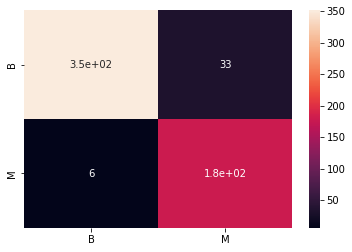

In [206]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);

In [207]:
print(classification_report(a,b))

              precision    recall  f1-score   support

       False       0.98      0.91      0.95       384
        True       0.84      0.97      0.90       185

    accuracy                           0.93       569
   macro avg       0.91      0.94      0.92       569
weighted avg       0.94      0.93      0.93       569



# Version 2

In [208]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [209]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [210]:
data['diagnosis']=np.where(data['diagnosis']=='M',1,0)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [211]:
X=data.iloc[:, 2:-1].values
y=data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [212]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

X_test.shape

torch.Size([114, 30])

In [213]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=30,hidden1=100,hidden2=100,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [214]:
torch.manual_seed(20)
model=ANN_Model()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [215]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [216]:
epochs=1000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 9.763959884643555
Epoch number: 11 and the loss : 0.6903240084648132
Epoch number: 21 and the loss : 0.6612697243690491
Epoch number: 31 and the loss : 0.6522195339202881
Epoch number: 41 and the loss : 0.6221506595611572
Epoch number: 51 and the loss : 0.579852819442749
Epoch number: 61 and the loss : 0.47451671957969666
Epoch number: 71 and the loss : 0.41255196928977966
Epoch number: 81 and the loss : 0.3567558228969574
Epoch number: 91 and the loss : 0.3340704143047333
Epoch number: 101 and the loss : 0.3147895336151123
Epoch number: 111 and the loss : 0.29732105135917664
Epoch number: 121 and the loss : 0.2826061248779297
Epoch number: 131 and the loss : 0.27026310563087463
Epoch number: 141 and the loss : 0.2593381702899933
Epoch number: 151 and the loss : 0.2495478242635727
Epoch number: 161 and the loss : 0.2403946816921234
Epoch number: 171 and the loss : 0.23224492371082306
Epoch number: 181 and the loss : 0.22493582963943481
Epoch number: 191 a

In [217]:
final_losses[0].item()

9.763959884643555

Text(0.5, 0, 'Epoch')

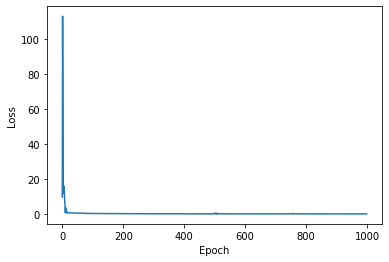

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [219]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0


array([[63,  4],
       [ 1, 46]])

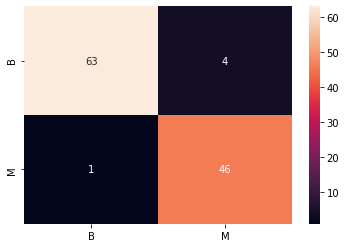

In [220]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_);
cm

In [221]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.956140350877193

#  Neural Net from First Principals

In [ ]:
dataset = pd.read_csv("BreastCancerDetection.csv")

In [222]:
#Now, let's normalized our feature vector.  We will force the mean of each column to 0, and divide by the maximum
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) #Normalizing our dataset by subtracting the mean and dividing by the max

In [223]:
#Now, let's split our dataset into two segments
# 1) Training set to train our neural net
# 2) A cross validation set to test the accuracy of our neural net

#We'll take the first 380 samples for our training set
X_train = X_normalized[:,:380]
Y_train = Y[:,:380]

#We will take the remaining 189 for our cross-validation set
X_cv = X_normalized[:,381:]
Y_cv = Y[:,381:]

NameError: name 'Y' is not defined

In [224]:
#We will now define our sigmoid function to be used in the output layer of our neural network (L3)
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [225]:
#We will now define our tanh(x) function to be used in hidden layers of our neural network (L1, L2)
#Note that the tanh(x) function allows better centering of data than the sigmoid function.  This is why it will be used in our hidden layers.

def tanh(z):
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

In [ ]:
#Now, let's define our forward propogation function.
def forward_prop(X,W1,W2,W3,b1,b2,b3):
    
    #First layer forward propogation
    Z1 = np.dot(W1,X)# where W1 represents our matrix of weights in L1, and X represents our feature matrix of measures
    A1 = tanh(Z1 + b1) #where b1 represents our intercept term for our first layer
    #Second layer forward propogation
    Z2 = np.dot(W2,A1) #where W2 represents our matrix of weights in L2
    A2 = tanh(Z2 + b2) # where b2 represents our intercept term for our second layer
    #Third layer forward propogation
    Z3 = np.dot(W3,A2) #where W3 represents our matrix of weights in L3
    #where b3 represents our intercept term for our second layer
    A3 = sigmoid(Z3 + b3) #A3 will produce our probability vector
    
    cache = {    
                  "Z1": Z1,
                  "A1": A1,
                  "Z2": Z2,
                  "A2": A2,
                  "Z3": Z3,
                  "A3": A3
            }
    return cache

In [ ]:
#Now we will perform gradient descent for our neural network in the following steps:
#1) Start by randomly initializing our weight and intercept parameters
#2) Run forward propogation through our neural network
#3) Calculate the derivatives of our weights and intercept parameters via back propogation
#4) Refine our parameters using derivatives from (3)
#5) Reiterate 1 - 4 

def gradient_descent(iterations,X,Y,alpha):
    
    #Randomly initialized our parameters before running the algorithm
    W1 = np.random.randn(3,30)*0.01
    b1 = np.random.rand(3,1)
    W2 = np.random.randn(2,3)*0.01
    b2 = np.random.rand(2,1)
    W3 = np.random.rand(1,2)*0.01
    b3 = np.random.rand(1,1)
    dummy,m = X.shape
    
    caches = [] #we will store our cost at each iteration in this array
    count_vector = [] #We will store our iteration count in this array
    count = 0
    
    for i in range (1,iterations):
        
            count = count + 1
            
            count_vector.append(count)
        
            params = forward_prop(X,W1,W2,W3,b1,b2,b3) #forward propogation using our parameters
            
            #Define our values to be used in back propogation using the dictionary of values created from running forward_prop
            Z1 = params['Z1']
            Z2 = params['Z2']
            Z3 = params['Z3']
            A1 = params['A1']
            A2 = params['A2']
            A3 = params['A3']
            
            #Define our cost function, append the cost of each iteration to caches
            cost = -(1 / m)*np.sum(np.multiply(Y,np.log(A3)) + np.multiply((1-Y),np.log(1-A3)))
            caches.append(cost)
            
            #Back propogation for layer 3
            dA3 = -Y/A3 + (1-Y)/(1-A3)
            dZ3 = dA3 * sigmoid(Z3)*(1-sigmoid(Z3))
            dW3 = (1 / m)*np.dot(dZ3,A2.T)
            db3 = (1 / m)*np.sum(dZ3,axis=1,keepdims=True)
            
            #Back propogation for layer 2
            dA2 = np.dot(W3.T,dZ3)
            dZ2 = dA2*(1-np.power(tanh(Z2),2))
            dW2 = (1 / m)*np.dot(dZ2,A1.T)
            db2 = (1 / m)*np.sum(dZ2,axis=1,keepdims=True)
            
            #Back propogation for layer 1
            dA1 = np.dot(W2.T,dZ2)
            dZ1 = dA1*(1-np.power(tanh(Z1),2))
            dW1 = (1 / m)*np.dot(dZ1,X.T)
            db1 = (1 / m)*np.sum(dZ1,axis=1,keepdims=True)
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            W1 = W1 - alpha*dW1
            W2 = W2 - alpha*dW2
            W3 = W3 - alpha*dW3
            
            #Redefine our weight parameters using the derivatives calculated in back propogation
            b1 = b1 - alpha*db1
            b2 = b2 - alpha*db2
            b3 = b3 - alpha*db3
        
    return W1,W2,W3,b1,b2,b3,count_vector,caches

In [ ]:
#Lets see if our algorithm is working.  We should see a declining learning curve with iteration, which eventually flatterns out
#This will help us determine the appropriate number of iterations to run to determine the appropriate parameters
#Note: we will use a learning rate of 0.5 for now

W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(1000,X_cv,Y_cv,0.5)

plt.plot(count,caches,label='Cost')

plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title("Cost vs. Iteration")

plt.legend()

plt.show()

In [ ]:
def predict(X,Y,iterations,alpha,X_train,Y_train):

    W1,W2,W3,b1,b2,b3,count,caches = gradient_descent(iterations,X_train,Y_train,alpha)
    
    Z1 = np.dot(W1,X)
    A1 = tanh(Z1 + b1)
    Z2 = np.dot(W2,A1)
    A2 = tanh(Z2 + b2)
    Z3 = np.dot(W3,A2)
    A3 = sigmoid(Z3 + b3)
    
    dummy,m = A3.shape
    Y_prediction = np.zeros((1, m))
    
    for i in range(m):
        
        Y_prediction[0, i] = 1 if A3[0, i] > 0.5 else 0
        
    return Y_prediction

In [ ]:
#Lets see how accurate the predictions made by our neural network are compared to the training set and cross validation set
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(X_train,Y_train,1000,0.5,X_train,Y_train) - Y_train)) * 100))
print("Cross validation accuracy: {} %".format(100 - np.mean(np.abs(predict(X_cv,Y_cv,1000,0.5,X_train,Y_train) - Y_cv)) * 100))

In [ ]:
dummy,m1 = X_train.shape
dummy,m2 = X_cv.shape

train_predict = predict(X_train,Y_train,1000,0.5,X_train,Y_train)
CV_predict = predict(X_cv,Y_cv,1000,0.5,X_train,Y_train)
count_true_pos = 0
count_train_pos = 0

count_true_pos_cv = 0
count_cv_pos = 0

for i in range (1,m1):
    if train_predict[0,i] == 1 and Y_train[0,i] == 1:
        count_true_pos = count_true_pos + 1
    if Y_train[0,i] == 1:
        count_train_pos = count_train_pos + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 1 and Y_cv[0,i] == 1:
        count_true_pos_cv = count_true_pos_cv + 1
    if Y_cv[0,i] == 1:
        count_cv_pos = count_cv_pos + 1
        
print(str(count_true_pos) + " positives predicted on the training set")
print(str(count_train_pos) + " true positives are in the training set")
print("The accuracy of true positives on the training set is: {} %".format(100-np.abs(100*((count_true_pos - count_train_pos)/count_train_pos))))
print("----------------------------------------------------------------")
print(str(count_true_pos_cv) + " positives predicted on the cross validation set")
print(str(count_cv_pos) + " true positives are in the cross validation set")
print("The accuracy of true positives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_pos_cv - count_cv_pos)/count_true_pos_cv))))

In [ ]:
count_true_neg = 0
count_train_neg = 0

count_true_neg_cv = 0
count_cv_neg = 0

for i in range (1,m1):
    if train_predict[0,i] == 0 and Y_train[0,i] == 0:
        count_true_neg = count_true_neg + 1
    if Y_train[0,i] == 0:
        count_train_neg = count_train_neg + 1
        
for i in range (1,m2):
    if CV_predict[0,i] == 0 and Y_cv[0,i] == 0:
        count_true_neg_cv = count_true_neg_cv + 1
    if Y_cv[0,i] == 0:
        count_cv_neg = count_cv_neg + 1
        
print(str(count_true_neg) + " negatives predicted on the training set")
print(str(count_train_neg) + " true negatives are in the training set")
print("The accuracy of true negatives on the training set is: {} %".format(100-np.abs(100*((count_true_neg - count_train_neg)/count_train_neg))))
print("----------------------------------------------------------------")
print(str(count_true_neg_cv) + " negatives predicted on the cross validation set")
print(str(count_cv_neg) + " true negatives are in the cross validation set")
print("The accuracy of true negatives on the cross validation set is: {} %".format(100-np.abs(100*((count_true_neg_cv - count_cv_neg)/count_true_neg_cv))))